In [1]:
import os
import pandas as pd

path= r"C:\Users\Lenovo\Desktop\IPL Data"
os.chdir(path)
os.listdir(path)
ball=pd.read_excel("Ball_by_Ball.xlsx")
match=pd.read_excel("Match.xlsx")
player = pd.read_excel("Player.xlsx")
season = pd.read_excel('Season.xlsx')
team =pd.read_excel("Team.xlsx")

In [14]:
##NUMBER OF MATCHES WON BY EACH TEAM IN IPL HISTORY???
Won_match = pd.crosstab(index =match['Match_Winner_Id'], columns='count').reset_index()
Won_match




col_0,Match_Winner_Id,count
0,1.0,68
1,2.0,70
2,3.0,79
3,4.0,63
4,5.0,63
5,6.0,56
6,7.0,80
7,8.0,29
8,9.0,6
9,10.0,12


In [20]:
##Getting the team name from team table


Team_wise_win = pd.merge(Won_match, team[['Team_Id', 'Team_Short_Code']],left_on = "Match_Winner_Id",right_on="Team_Id")

Team_wise_win


##Selecting only the team_short_code and count columns

Team_wise_win=Team_wise_win[['Team_Short_Code','count']]
Team_wise_win.sort_values(by = 'count',ascending = False)

,Team_Short_Code,count
6,MI,80
2,CSK,79
1,RCB,70
0,KKR,68
3,KXIP,63
4,RR,63
5,DD,56
10,SRH,34
7,DC,29
9,PW,12


In [23]:
##Total number of match played by each team??


Total_match_at_home = pd.crosstab(index=match['Team_Name_Id'],columns='Home_Match').reset_index()
Total_match_at_home

col_0,Team_Name_Id,Home_Match
0,1,62
1,2,78
2,3,74
3,4,65
4,5,52
5,6,69
6,7,62
7,8,39
8,9,7
9,10,23


In [25]:
Total_match_at_away = pd.crosstab(index=match['Opponent_Team_Id'],columns='Away_Match').reset_index()
Total_match_at_away

col_0,Opponent_Team_Id,Away_Match
0,1,70
1,2,61
2,3,57
3,4,69
4,5,66
5,6,64
6,7,78
7,8,36
8,9,7
9,10,23


In [28]:
#Toatal matches
Total_match = pd.merge(Total_match_at_home,Total_match_at_away,left_on='Team_Name_Id',right_on='Opponent_Team_Id')
Total_match

col_0,Team_Name_Id,Home_Match,Opponent_Team_Id,Away_Match
0,1,62,1,70
1,2,78,2,61
2,3,74,3,57
3,4,65,4,69
4,5,52,5,66
5,6,69,6,64
6,7,62,7,78
7,8,39,8,36
8,9,7,9,7
9,10,23,10,23


In [30]:
#Adding a columns of home matches and away matches???


Total_match['Total'] = Total_match['Home_Match'] +  Total_match['Away_Match']
Total_match

col_0,Team_Name_Id,Home_Match,Opponent_Team_Id,Away_Match,Total
0,1,62,1,70,132
1,2,78,2,61,139
2,3,74,3,57,131
3,4,65,4,69,134
4,5,52,5,66,118
5,6,69,6,64,133
6,7,62,7,78,140
7,8,39,8,36,75
8,9,7,9,7,14
9,10,23,10,23,46


In [32]:
##Selecting only the columns with Team Name ID and Total

Total_match = Total_match[['Team_Name_Id','Total']]
Total_match

col_0,Team_Name_Id,Total
0,1,132
1,2,139
2,3,131
3,4,134
4,5,118
5,6,133
6,7,140
7,8,75
8,9,14
9,10,46


In [34]:
##Lets get the team name??


Total_match = pd.merge(Total_match,team[['Team_Id','Team_Short_Code']],left_on = 'Team_Name_Id',right_on="Team_Id")
Total_match = Total_match[['Team_Short_Code','Total']]

Total_match

KeyError: 'Team_Name_Id'

In [36]:
Total_match

,Team_Short_Code,Total
0,KKR,132
1,RCB,139
2,CSK,131
3,KXIP,134
4,RR,118
5,DD,133
6,MI,140
7,DC,75
8,KTK,14
9,PW,46


In [38]:
Final_Table = pd.merge(Team_wise_win,Total_match)
Final_Table

,Team_Short_Code,count,Total
0,KKR,68,132
1,RCB,70,139
2,CSK,79,131
3,KXIP,63,134
4,RR,63,118
5,DD,56,133
6,MI,80,140
7,DC,29,75
8,KTK,6,14
9,PW,12,46


In [41]:
Final_Table['Percent_win'] = round(((Final_Table['count']/Final_Table['Total'])*100),2)
Final_Table.sort_values(by = 'Percent_win' , ascending = False)

,Team_Short_Code,count,Total,Percent_win
2,CSK,79,131,60.31
6,MI,80,140,57.14
12,GL,9,16,56.25
10,SRH,34,62,54.84
4,RR,63,118,53.39
0,KKR,68,132,51.52
1,RCB,70,139,50.36
3,KXIP,63,134,47.01
8,KTK,6,14,42.86
5,DD,56,133,42.11


In [52]:
##Two way Cross Table
##No. of matches won by each team while batting first and chasing??

Team_wise_win_type = pd.crosstab(index=match["Match_Winner_Id"], columns=match['Win_Type']).reset_index()
Team_wise_win_type


Win_Type,Match_Winner_Id,Tie,by runs,by wickets
0,1.0,0,29,39
1,2.0,1,27,42
2,3.0,0,46,33
3,4.0,2,28,33
4,5.0,2,23,38
5,6.0,0,18,38
6,7.0,0,43,37
7,8.0,0,18,11
8,9.0,0,2,4
9,10.0,0,6,6


In [55]:
Team_wise_win_type = pd.merge(Team_wise_win_type, team[['Team_Id','Team_Short_Code']],left_on="Match_Winner_Id",right_on="Team_Id")
Team_wise_win_type                       

,Match_Winner_Id,Tie,by runs,by wickets,Team_Id_x,Team_Short_Code_x,Team_Id_y,Team_Short_Code_y
0,1.0,0,29,39,1,KKR,1,KKR
1,2.0,1,27,42,2,RCB,2,RCB
2,3.0,0,46,33,3,CSK,3,CSK
3,4.0,2,28,33,4,KXIP,4,KXIP
4,5.0,2,23,38,5,RR,5,RR
5,6.0,0,18,38,6,DD,6,DD
6,7.0,0,43,37,7,MI,7,MI
7,8.0,0,18,11,8,DC,8,DC
8,9.0,0,2,4,9,KTK,9,KTK
9,10.0,0,6,6,10,PW,10,PW


In [59]:
Team_wise_win_type = pd.merge(Team_wise_win_type, team[['Team_Id','Team_Short_Code']],left_on="Match_Winner_Id",right_on="Team_Id")
Team_wise_win_type = Team_wise_win_type[['Team_Short_Code','by runs','by wickets','Tie']]
Team_wise_win_type

,Team_Short_Code,by runs,by wickets,Tie
0,KKR,29,39,0
1,RCB,27,42,1
2,CSK,46,33,0
3,KXIP,28,33,2
4,RR,23,38,2
5,DD,18,38,0
6,MI,43,37,0
7,DC,18,11,0
8,KTK,2,4,0
9,PW,6,6,0


In [1]:
import os
import pandas as pd

path= r"C:\Users\Lenovo\Desktop\IPL Data"
os.chdir(path)
os.listdir(path)
ball=pd.read_excel("Ball_by_Ball.xlsx")
match=pd.read_excel("Match.xlsx")
player = pd.read_excel("Player.xlsx")
season = pd.read_excel('Season.xlsx')
team =pd.read_excel("Team.xlsx")

In [3]:

team_wise_win_type=match.groupby(['Match_Winner_Id', 'Win_Type']).size().reset_index()
team_wise_win_type

,Match_Winner_Id,Win_Type,0
0,1.0,by runs,29
1,1.0,by wickets,39
2,2.0,Tie,1
3,2.0,by runs,27
4,2.0,by wickets,42
5,3.0,by runs,46
6,3.0,by wickets,33
7,4.0,Tie,2
8,4.0,by runs,28
9,4.0,by wickets,33


In [5]:
#Converting the long data to wide data
Final_data = team_wise_win_type.pivot('Match_Winner_Id' ,'Win_Type', 0)
Final_data

Win_Type,Tie,by runs,by wickets
Match_Winner_Id,,,
1.0,NaN,29.0,39.0
2.0,1.0,27.0,42.0
3.0,NaN,46.0,33.0
4.0,2.0,28.0,33.0
5.0,2.0,23.0,38.0
6.0,NaN,18.0,38.0
7.0,NaN,43.0,37.0
8.0,NaN,18.0,11.0
9.0,NaN,2.0,4.0


In [6]:
##Filling the missing values by 0
Final_data = Final_data.fillna(0)
Final_data

Win_Type,Tie,by runs,by wickets
Match_Winner_Id,,,
1.0,0.0,29.0,39.0
2.0,1.0,27.0,42.0
3.0,0.0,46.0,33.0
4.0,2.0,28.0,33.0
5.0,2.0,23.0,38.0
6.0,0.0,18.0,38.0
7.0,0.0,43.0,37.0
8.0,0.0,18.0,11.0
9.0,0.0,2.0,4.0


# MultiDimesnsional Table

In [7]:
#PS=Win type by each team in each season

In [11]:
season_wise_team_win = pd.crosstab(index=[match['Match_Winner_Id'],match['Season_Id']],columns=match['Win_Type'])
season_wise_team_win

Win_Type                   Tie  by runs  by wickets
Match_Winner_Id Season_Id                          
1.0             1            0        4           2
                2            0        1           2
                3            0        4           3
                4            0        4           4
                5            0        6           6
                6            0        2           4
                7            0        4           7
                8            0        2           5
                9            0        2           6
2.0             1            0        2           2
                2            0        3           6
                3            0        1           7
                4            0        3           7
                5            0        4           4
                6            1        5           3
                7            0        1           4
                8            0        3           5
                9            0        5           4
3.0             1            0        5           4
                2            0        6           2
                3            0        5           4
                4            0        8           3
                5            0        5           5
                6            0        7           5
                7            0        3           7
                8            0        7           3
4.0             1            0        5           5
                2            0        3           4
                3            1        0           3
                4            0        4           3
...                        ...      ...         ...
6.0             4            0        2           2
                5            0        2           9
                6            0        1           2
                7            0        0           2
                8            0        2           3
                9            0        2           5
7.0             1            0        2           5
                2            0        4           1
                3            0        8           3
                4            0        5           5
                5            0        3           7
                6            0        9           4
                7            0        3           4
                8            0        7           3
                9            0        2           5
8.0             1            0        0           2
                2            0        5           4
                3            0        5           3
                4            0        5           1
                5            0        3           1
9.0             4            0        2           4
10.0            4            0        0           4
                5            0        3           1
                6            0        3           1
11.0            6            1        4           5
                7            0        3           3
                8            0        6           1
                9            0        5           6
12.0            9            0        2           3
13.0            9            0        1           8

[76 rows x 3 columns]

In [12]:
list(match)

['Match_Id',
 'Match_Date',
 'Team_Name_Id',
 'Opponent_Team_Id',
 'Season_Id',
 'Venue_Name',
 'Toss_Winner_Id',
 'Toss_Decision',
 'IS_Superover',
 'IS_Result',
 'Is_DuckWorthLewis',
 'Win_Type',
 'Won_By',
 'Match_Winner_Id',
 'Man_Of_The_Match_Id',
 'First_Umpire_Id',
 'Second_Umpire_Id',
 'City_Name',
 'Host_Country']

In [51]:
#which team in ipl history has highest average match aggregate in IPl history??
#Toatal matches
Total_match_at_home = pd.crosstab(index=match['Team_Name_Id'],columns='Home_Match').reset_index()
Total_match_at_home
Total_match_at_away = pd.crosstab(index=match['Opponent_Team_Id'],columns='Away_Match').reset_index()
Total_match_at_away
#Toatal matches
Total_match = pd.merge(Total_match_at_home,Total_match_at_away,left_on='Team_Name_Id',right_on='Opponent_Team_Id')
Total_match
Total_match['Total'] = Total_match['Home_Match'] +  Total_match['Away_Match']
Total_match
Total_match = Total_match[['Team_Name_Id','Total']]
Total_match

col_0,Team_Name_Id,Total
0,1,132
1,2,139
2,3,131
3,4,134
4,5,118
5,6,133
6,7,140
7,8,75
8,9,14
9,10,46


In [56]:
##Total Runs Scored by each Team
Total_Run=ball.groupby(["Team_Batting_Id"])["Batsman_Scored"].sum().reset_index()
Total_Run


,Team_Batting_Id,Batsman_Scored
0,1,18209
1,2,20464
2,3,19940
3,4,19720
4,5,16658
5,6,18532
6,7,20662
7,8,10881
8,9,1758
9,10,6040


In [60]:
ps_final1=pd.merge(Total_Run,Total_match,left_on="Team_Batting_Id",right_on="Team_Name_Id")
ps_final1=ps_final1[["Team_Name_Id","Batsman_Scored","Total"]]
ps_final1

,Team_Name_Id,Batsman_Scored,Total
0,1,18209,132
1,2,20464,139
2,3,19940,131
3,4,19720,134
4,5,16658,118
5,6,18532,133
6,7,20662,140
7,8,10881,75
8,9,1758,14
9,10,6040,46


In [66]:
#Calculate average
ps_final1["avg_agg"] = round((ps_final1.Batsman_Scored/ps_final1.Total),2)
ps_final1

,Team_Name_Id,Batsman_Scored,Total,avg_aff,avg_agg
0,1,18209,132,137.95,137.95
1,2,20464,139,147.22,147.22
2,3,19940,131,152.21,152.21
3,4,19720,134,147.16,147.16
4,5,16658,118,141.17,141.17
5,6,18532,133,139.34,139.34
6,7,20662,140,147.59,147.59
7,8,10881,75,145.08,145.08
8,9,1758,14,125.57,125.57
9,10,6040,46,131.30,131.30


In [68]:
ps_final1.sort_values(by="avg_agg",ascending=False).head(1)

,Team_Name_Id,Batsman_Scored,Total,avg_aff,avg_agg
2,3,19940,131,152.21,152.21


In [71]:
#Create a table containing higtest scored team in every season?

In [27]:
ball.head()

,Match_Id,Season_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
0,335987,1,1,1,1,1,2,1,1,2,14,0,legbyes,1,,,
1,335987,1,1,1,2,1,2,2,2,1,14,0,,,,,
2,335987,1,1,1,3,1,2,2,2,1,14,0,wides,1,,,
3,335987,1,1,1,4,1,2,2,2,1,14,0,,,,,
4,335987,1,1,1,5,1,2,2,2,1,14,0,,,,,


# BOX PLOT FOR VIRAT KOHLI IN Every Venue

In [2]:
VK=ball[ball['Striker_Id']==21]

In [3]:
VK1=VK[['Match_Id','Striker_Id','Batsman_Scored']]
VK1.head()

,Match_Id,Striker_Id,Batsman_Scored
270,335988,21,1
273,335988,21,6
274,335988,21,0
276,335988,21,4
277,335988,21,1


In [6]:
VK2=VK1.groupby('Match_Id')['Batsman_Scored'].sum().reset_index()
VK2

,Match_Id,Batsman_Scored
0,335988,32
1,335994,53
2,336001,28
3,336006,3
4,336010,27
5,336012,32
6,336014,1
7,336018,26
8,336023,1
9,336034,21


In [ ]:
pd.to csv

In [59]:
VK3=pd.merge(VK2,match[['Match_Id','Venue_Name']],left_on='Match_Id',right_on='Match_Id',how='left')
VK3

,Match_Id,Batsman_Scored,Venue_Name
0,335987,1,M Chinnaswamy Stadium
1,335990,23,Wankhede Stadium
2,335997,13,M Chinnaswamy Stadium
3,336001,12,M Chinnaswamy Stadium
4,336003,1,Feroz Shah Kotla
5,336007,9,"Rajiv Gandhi International Stadium, Uppal"
6,336011,34,M Chinnaswamy Stadium
7,336017,0,M Chinnaswamy Stadium
8,336021,21,"Punjab Cricket Association Stadium, Mohali"
9,336028,3,Sawai Mansingh Stadium


In [54]:
VK4=VK3.groupby('Venue_Name')['Batsman_Scored'].sum().reset_index()
VK5 = VK4.sort_values(by='Batsman_Scored',ascending=False)

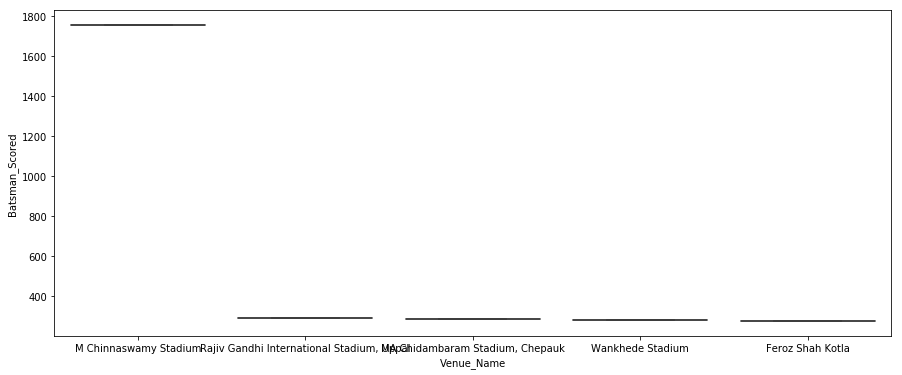

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=15,6
sns.boxplot(data=VK6.head(5), x='Venue_Name', y='Batsman_Scored')

In [56]:
VK5.head()

,Venue_Name,Batsman_Scored
8,M Chinnaswamy Stadium,1759
16,"Rajiv Gandhi International Stadium, Uppal",292
9,"MA Chidambaram Stadium, Chepauk",285
27,Wankhede Stadium,280
4,Feroz Shah Kotla,277


In [62]:
VK6 = VK3[(VK3.Venue_Name=="M Chinnaswamy Stadium") | (VK3.Venue_Name=="Rajiv Gandhi International Stadium, Uppal") |(VK3.Venue_Name=="MA Chidambaram Stadium, Chepauk")|(VK3.Venue_Name=="Wankhede Stadium")|(VK3.Venue_Name=="Feroz Shah Kotla")]
VK6

,Match_Id,Batsman_Scored,Venue_Name
0,335987,1,M Chinnaswamy Stadium
1,335990,23,Wankhede Stadium
2,335997,13,M Chinnaswamy Stadium
3,336001,12,M Chinnaswamy Stadium
4,336003,1,Feroz Shah Kotla
5,336007,9,"Rajiv Gandhi International Stadium, Uppal"
6,336011,34,M Chinnaswamy Stadium
7,336017,0,M Chinnaswamy Stadium
10,336034,10,"MA Chidambaram Stadium, Chepauk"
11,336039,38,M Chinnaswamy Stadium


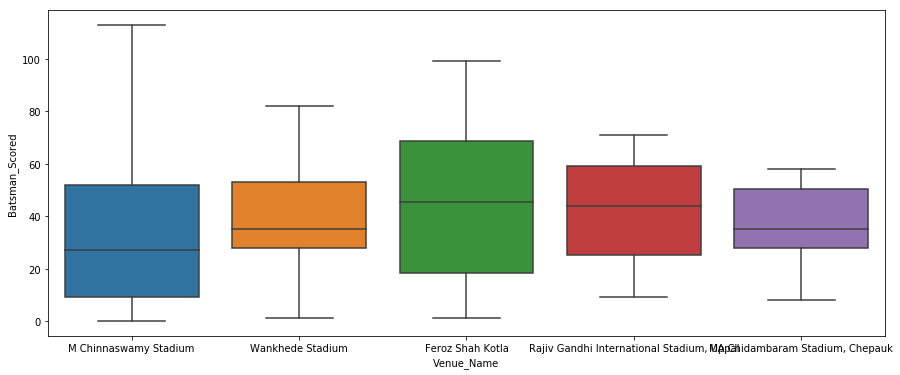

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=15,6
sns.boxplot(data=VK6, x='Venue_Name', y='Batsman_Scored')

In [44]:
scoring_match=ball.groupby('Match_Id')['Batsman_Scored'].sum().reset_index()
scoring_match
scoring_match_season_wise=pd.merge(scoring_match,match,left_on='Match_Id',right_on='Match_Id')
scoring_match_season_wise

,Match_Id,Batsman_Scored,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,City_Name,Host_Country
0,335987,268,2008-04-18,2,1,1,M Chinnaswamy Stadium,2,field,0,1,0,by runs,140.0,1.0,2.0,470,477,Bangalore,India
1,335988,430,2008-04-19,4,3,1,"Punjab Cricket Association Stadium, Mohali",3,bat,0,1,0,by runs,33.0,3.0,19.0,471,487,Chandigarh,India
2,335989,240,2008-04-19,6,5,1,Feroz Shah Kotla,5,bat,0,1,0,by wickets,9.0,6.0,90.0,472,512,Delhi,India
3,335990,315,2008-04-20,7,2,1,Wankhede Stadium,7,bat,0,1,0,by wickets,5.0,2.0,11.0,473,476,Mumbai,India
4,335991,184,2008-04-20,1,8,1,Eden Gardens,8,bat,0,1,0,by wickets,5.0,1.0,4.0,474,486,Kolkata,India
5,335992,318,2008-04-21,5,4,1,Sawai Mansingh Stadium,4,bat,0,1,0,by wickets,6.0,5.0,32.0,472,513,Jaipur,India
6,335993,268,2008-04-22,8,6,1,"Rajiv Gandhi International Stadium, Uppal",8,bat,0,1,0,by wickets,9.0,6.0,41.0,475,492,Hyderabad,India
7,335994,379,2008-04-23,3,7,1,"MA Chidambaram Stadium, Chepauk",7,field,0,1,0,by runs,6.0,3.0,18.0,476,512,Chennai,India
8,335995,418,2008-04-24,8,5,1,"Rajiv Gandhi International Stadium, Uppal",5,field,0,1,0,by wickets,3.0,5.0,31.0,470,471,Hyderabad,India
9,335996,284,2008-04-25,4,7,1,"Punjab Cricket Association Stadium, Mohali",7,field,0,1,0,by runs,66.0,4.0,26.0,472,492,Chandigarh,India


In [45]:
low_score=scoring_match_season_wise[scoring_match_season_wise.Batsman_Scored<300]
low_score

,Match_Id,Batsman_Scored,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,City_Name,Host_Country
0,335987,268,2008-04-18,2,1,1,M Chinnaswamy Stadium,2,field,0,1,0,by runs,140.0,1.0,2.0,470,477,Bangalore,India
2,335989,240,2008-04-19,6,5,1,Feroz Shah Kotla,5,bat,0,1,0,by wickets,9.0,6.0,90.0,472,512,Delhi,India
4,335991,184,2008-04-20,1,8,1,Eden Gardens,8,bat,0,1,0,by wickets,5.0,1.0,4.0,474,486,Kolkata,India
6,335993,268,2008-04-22,8,6,1,"Rajiv Gandhi International Stadium, Uppal",8,bat,0,1,0,by wickets,9.0,6.0,41.0,475,492,Hyderabad,India
9,335996,284,2008-04-25,4,7,1,"Punjab Cricket Association Stadium, Mohali",7,field,0,1,0,by runs,66.0,4.0,26.0,472,492,Chandigarh,India
10,335997,264,2008-04-26,2,5,1,M Chinnaswamy Stadium,5,field,0,1,0,by wickets,7.0,5.0,32.0,471,475,Bangalore,India
11,335998,273,2008-04-26,3,1,1,"MA Chidambaram Stadium, Chepauk",1,bat,0,1,0,by wickets,9.0,3.0,22.0,474,479,Chennai,India
12,335999,289,2008-04-27,7,8,1,Dr DY Patil Sports Academy,8,field,0,1,0,by wickets,10.0,8.0,53.0,470,487,Mumbai,India
15,336002,247,2008-04-29,1,7,1,Eden Gardens,1,bat,0,1,0,by wickets,7.0,7.0,44.0,474,479,Kolkata,India
22,336009,281,2008-05-04,7,6,1,Dr DY Patil Sports Academy,6,field,0,1,0,by runs,29.0,7.0,49.0,475,477,Mumbai,India


In [46]:
high_score=scoring_match_season_wise[scoring_match_season_wise.Batsman_Scored>300]
high_score

,Match_Id,Batsman_Scored,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,City_Name,Host_Country
1,335988,430,2008-04-19,4,3,1,"Punjab Cricket Association Stadium, Mohali",3,bat,0,1,0,by runs,33.0,3.0,19.0,471,487,Chandigarh,India
3,335990,315,2008-04-20,7,2,1,Wankhede Stadium,7,bat,0,1,0,by wickets,5.0,2.0,11.0,473,476,Mumbai,India
5,335992,318,2008-04-21,5,4,1,Sawai Mansingh Stadium,4,bat,0,1,0,by wickets,6.0,5.0,32.0,472,513,Jaipur,India
7,335994,379,2008-04-23,3,7,1,"MA Chidambaram Stadium, Chepauk",7,field,0,1,0,by runs,6.0,3.0,18.0,476,512,Chennai,India
8,335995,418,2008-04-24,8,5,1,"Rajiv Gandhi International Stadium, Uppal",5,field,0,1,0,by wickets,3.0,5.0,31.0,470,471,Hyderabad,India
14,336001,332,2008-04-28,2,3,1,M Chinnaswamy Stadium,3,bat,0,1,0,by runs,13.0,3.0,20.0,478,513,Bangalore,India
16,336003,356,2008-04-30,6,2,1,Feroz Shah Kotla,2,field,0,1,0,by runs,10.0,6.0,118.0,472,514,Delhi,India
17,336004,321,2008-05-01,8,4,1,"Rajiv Gandhi International Stadium, Uppal",4,field,0,1,0,by wickets,7.0,4.0,100.0,478,513,Hyderabad,India
18,336005,321,2008-05-01,5,1,1,Sawai Mansingh Stadium,5,bat,0,1,0,by runs,45.0,5.0,101.0,477,512,Jaipur,India
19,336006,328,2008-05-02,3,6,1,"MA Chidambaram Stadium, Chepauk",3,bat,0,1,0,by wickets,8.0,6.0,41.0,474,486,Chennai,India


In [48]:
high_score.groupby("Season_Id")['Match_Id'].count().reset_index()

,Season_Id,Match_Id
0,1,24
1,2,13
2,3,26
3,4,23
4,5,28
5,6,28
6,7,32
7,8,31
8,9,35


In [49]:
low_score.groupby("Season_Id").size()

Season_Id
1    33
2    44
3    33
4    50
5    45
6    47
7    27
8    28
9    25
dtype: int64